<a href="https://colab.research.google.com/github/vinicius-pf/Imersao_Dados/blob/main/Aula_05_Vinicius_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=Yellow> 1. AULA

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set()

In [9]:

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv(url_dados_resultados)

dados_renomeados = dados.copy()
mapa = {'droga': 'composto'}
dados_renomeados.columns = dados_renomeados.columns.str.replace("[-]", "")
dados_renomeados.rename(columns=mapa, inplace=True)

dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa']!=0)
dados_unidos = pd.merge(dados_renomeados, dados_resultados[['id','n_moa', 'ativo_moa']], on = 'id')


cod_compostos = dados_renomeados['composto'].value_counts().index[0:5]

dados_c = dados.loc[:,'c-0':'c-99']
dados_c_descritos = dados_c.describe()
dados_c_tranpostos = dados_c_descritos.T

dados_g = dados.loc[:,'g-0':'g-771']
dados_g_descritos = dados_g.describe()
dados_g_tranpostos = dados_g_descritos.T

In [10]:
dados_unidos.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [11]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [12]:
x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_rlogistica = LogisticRegression(max_iter = 1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.631954650430401

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)


0.6067604450976275

In [14]:
dados_unidos['ativo_moa'].value_counts(normalize = True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

In [15]:
from sklearn.tree import DecisionTreeClassifier

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_arvore = DecisionTreeClassifier(max_depth = 20)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.5685492336762544

In [16]:
from sklearn.tree import DecisionTreeClassifier

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

teste = []
treino = []

for i in range(1, 15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    modelo_arvore.score(x_teste, y_teste)
    treino.append(modelo_arvore.score(x_treino, y_treino))
    teste.append(modelo_arvore.score(x_teste, y_teste))

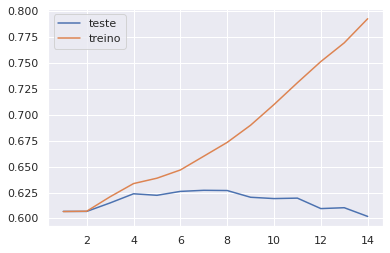

In [17]:
sns.lineplot(x=range(1,15), y = teste, label = 'teste')
sns.lineplot(x=range(1,15), y = treino, label = 'treino')

In [18]:
pd.get_dummies(dados_unidos, columns=['dose', 'tratamento', 'tempo'])

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,...,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,dose_D1,dose_D2,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1,0,0,1,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,1,0,0,1,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,1,0,0,1,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,1,0,0,1,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108

In [19]:
from sklearn.ensemble import RandomForestClassifier

x = dados_unidos.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis = 1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)


modelo_floresta = RandomForestClassifier()
modelo_floresta.fit(x_treino, y_treino)
modelo_floresta.score(x_teste, y_teste)

0.6907411295402057

# <font color=Yellow> 2. Desafios

##Desafio 01: Tentar outros modelos de machine learning ou mudar os parametros testados

Primeiro, testamos novos parametros nos modelos de machine learning já apresentados hoje. 

#### Regressão logistica

In [20]:
from sklearn.linear_model import LogisticRegression

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_rlogistica = LogisticRegression(max_iter = 10000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.631954650430401

Ao utilizar o modelo de Regressão Lógica, alterando o parâmetro 'max_iter', percebe-se uma mudança de score, mas pequena, de onde pode-se concluir que o modelo pode não ser o ideal. Em testes, ao alterar os parametros 'penalty' para 'l1, necessita também alterar 'solver', que nos testes foi definido em 'saga'. Esta mudança também não aumentou a acurácia do modelo para esse dataset.

#### Árvore de decisão

In [21]:
from sklearn.tree import DecisionTreeClassifier

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 15, stratify = y,  test_size = 0.2)

modelo_arvore = DecisionTreeClassifier(max_depth = 50)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.5561620827209742

Na aula, percebeu-se que, a medida que o parametro 'max_depth' aumenta, o 'score' mostra que o modelo não melhora suas decisões. Esse primeiro teste foi feito com um 'max_depth' maior, e o seguinte com parametro menor, tendo um resultado um pouco melhor. A diferença nos dois testes novamente não mostra grande diferença.

In [22]:
from sklearn.tree import DecisionTreeClassifier

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 15, stratify = y,  test_size = 0.25)

modelo_arvore = DecisionTreeClassifier(max_depth = 10)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6140409808532079

In [23]:
from sklearn.tree import DecisionTreeClassifier

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 15, stratify = y,  test_size = 0.25)

modelo_arvore = DecisionTreeClassifier(max_depth = 50)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.5812898891501511

Um ultimo teste, para ver se o tamanho do test_size pode ter influencia no resultado, mostrou que ele não interfere significantemente no resultado do 'score'.

### Floresta

In [24]:
from sklearn.ensemble import RandomForestClassifier

x = dados_unidos.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis = 1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)


modelo_floresta = RandomForestClassifier(n_estimators = 1000, warm_start= True)
modelo_floresta.fit(x_treino, y_treino)
modelo_floresta.score(x_teste, y_teste)

0.695570018895654

Por ultimo, dos modelos vistos em aula, deve-se testar novos parametros para o modelo de Random Forest. A alteração no parametro 'n_estimators' aumenta a quantidade de arvores na floresta, e o parametro 'warm_start', quando 'True', utiliza chamadas do modelo anterioes para ajustar o método fit, e tambem aumenta o número de 'estimators' no modelo. Em redefinir esses parametros, o tempo de execução do modelo aumenta. Após 13 minutos de calculos, o 'score' teve uma melhora, mas também não suficiente. Com um valor maior de 'n_estimators' pode se chegar a um valor mais interessante, próximo de 90%, porém o aumento do tempo de execução pode trazer mais pontos negativos.

Outros modelos de predição serão analisados no desafio 03.

## Desafio 02: Estudar a documentação do Sklearn

## Desafio 03: Ler Choosing the right estimator

O tutorial encontrado em https://scikit-learn.org/stable/tutorial/machine_learning_map/ permite fazer uma escolha melhor em relação ao modelo de machine learning para os dados apresentados. De acordo com o tutorial, sabendo que as informações que temos são: menos de 100.000 amostras, prevendo uma categoria e trabalhando com 'labeled data', modelos com base SVC(Support Vector Machines) pode ser utilizado.

O primeiro a ser testado é o modelo LinearSVC.

###LinearSVC

In [25]:
from sklearn.svm import LinearSVC

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_lsvc= LinearSVC()
modelo_lsvc.fit(x_treino, y_treino)
modelo_lsvc.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5996220869200084

In [26]:
from sklearn.svm import LinearSVC

x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_rlogistica = LinearSVC(max_iter=10000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6296451816082301

Foram feito dois testes, um com o valor padrao de 'max_iter' e outro com um valor 10 vezes maior. Apesar de ser útil, o resultado ainda não foi o ideal.

### SVC

Continuando com modelos base SVC, há, na biblioteca Sci-Kit Learn, o modelo SVC. Há tambem o NuSVC, porém a diferença entre os dois dá em aceitar um set de parametros um pouco diferentes, por isso o modelo NuSVC não será testado.

In [27]:
from sklearn.svm import SVC

x = dados_unidos.select_dtypes('float64')
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_svc = SVC()
modelo_svc.fit(x_treino, y_treino)
modelo_svc.score(x_teste, y_teste)

0.6613478899853034

Novamente os dados apresentaram melhora, porém sem mostrar grande melhora em relação aos modelos vistos durante a aula.

## Desafio 04: Mudar ativo_moa, e conferir a acuracia dos modelos vistos. 

###Definições do desafio

Primeiro, vamos alterar a coluna 'ativo_moa' para que seja 'True' em que os MoA ativados são maiores que 2. 

In [28]:
dados_desafio = dados_unidos.copy()
dados_desafio['ativo_moa'] = dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] > 2)
dados_desafio.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,False


In [29]:
dados_desafio['ativo_moa'].value_counts(normalize=True)

False    0.984169
True     0.015831
Name: ativo_moa, dtype: float64

Com a nova tabela, podemos refazer alguns modelos de machine learning. Da aula, foi trazido o modelo de regressão linear e random forest, e do organograma visto no desafio 3 foi trazido o modelo SVC.

### Testes de modelos

#### Linear Regression

In [30]:
x = dados_unidos.select_dtypes('float64')
y = dados_unidos['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_rlogistica = LogisticRegression(max_iter=2000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.631954650430401

Fazendo o teste com o modelo, percebe-se que o valor não é muito diferente. O nosso filtro de MoA ativos pode não ser diferente, ou o modelo pode não ser o ideal para a aplicação.

#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

x = dados_desafio.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis = 1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = dados_desafio['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)


modelo_floresta = RandomForestClassifier()
modelo_floresta.fit(x_treino, y_treino)
modelo_floresta.score(x_teste, y_teste)

0.9842536216670166

Com esse novo teste, percebe-se que o modelo de regressão linear não é o ideal para a aplicação. O filtro novo de 'ativo_moa' pode ser a resposta para o resultado mais ideal do modelo.

Os filtro anterior, apenas verificando se havia algum 'ativo_moa' era muito abrangente, com pouca variação entre as variaveis, sendo 60% true e 40% false. Com esse novo filtro, apenas 1% das amostras trazem o ativo_moa como true, facilitando assim novas descobertas. 

#### SVC

In [32]:
from sklearn.svm import SVC

x = dados_desafio.select_dtypes('float64')
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_svc = SVC()
modelo_svc.fit(x_treino, y_treino)
modelo_svc.score(x_teste, y_teste)

0.9869829939114004

O teste de SVC também trouxe uma eficácia desejavel para o projeto. A diferença de acuracia entre o SVC e o Random Forest exite, mas é muito pequena para ser considerada. A grande diferença está no tempo de execução e teste dos dois modelos, já que o Random Forest é mais demorado que o modelo SVC, que julgo ideal para esse projeto.

##Desafio 05: Escolher a droga mais utilizada e tente criar um modelo para prever a label.

Nas analises da aula 1, foi descoberta que a droga mais utilizada tem 'cacb2b860' e é o grupo de controle. Nos desafios da aula 4, foi criada uma nova coluna nos dados, chamada de 'eh_controle'. Utilizando essas duas informações, podemos fazer análises de machine learning. Primeiramente utilizando essa coluna e fazendo uma analise de regressão logistica.

#### Criando novamente a tabela

In [37]:
dados_desafio = dados_unidos.copy()
dados_desafio['eh_controle'] = (dados_unidos['tratamento'] == 'com_controle')
dados_desafio

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.4420,0.9641,-0.1846,-0.001

#### Aplicando os modelos escolhidos

In [44]:
from sklearn.linear_model import LogisticRegression

x = dados_desafio.select_dtypes('float64')
y = dados_desafio['eh_controle']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 245436, stratify = y,  test_size = 0.2)

modelo_rlogistica = LogisticRegression(max_iter = 10000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9479319756456015

Com esse score, podemos entender que o modelo é útil para o projeto. Há outros modelos de machine learning que podem ser aplicados, como os modelos Naive Bayes, que trabalham bem com textos.

##Desafio 06: Resumão das analises


Nas analises de hoje, aplicou-se modelos de machine learning para tentar descobrir drogas novas.

Com a definição das aulas anteriores, onde se aceita quaisquer MoA, percebeu-se, utilizando de diversos modelos de machine learning, dentre eles Regressão Linear e Árvore de Decisões, percebeu-se que a acurácia dos modelos não seria suficiente para encontrar compostos novos.

Além das testadas em aula, também foram aplicados métodos com base em SVC, que também não foram eficazes.

Apenas com a mudança de definição para compostos que ativaram 3 ou mais MoA que foi possível aplicar um modelo de machine learning que preve com uma acurácia maior que 90% novos compostos. Os modelos Random Forest e SVC conseguiram essa acurácia, ambos com seus pontos positivos e negativos em relação a aplicação em projetos específicos.